<a href="https://colab.research.google.com/github/karljmurphy/logistic_regression/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sml
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving iris_2.csv to iris_2.csv


In [3]:
df = pd.read_csv('iris_2.csv')
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Observation: means and medians for each recorded feature are close which suggests that data is normally distributed

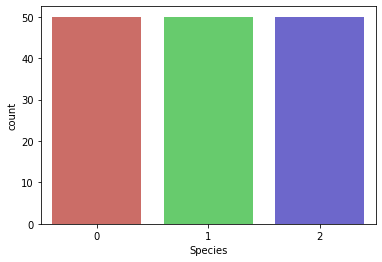

<Figure size 432x288 with 0 Axes>

In [4]:

sns.countplot(x='Species', data=df, palette='hls')
plt.show()
plt.savefig('count-plot')


# We see from the above histogram that the "Species" variable is well balanced with equal representations which minimizes the risk of bias occurring as would be the case if one class had more records than another.

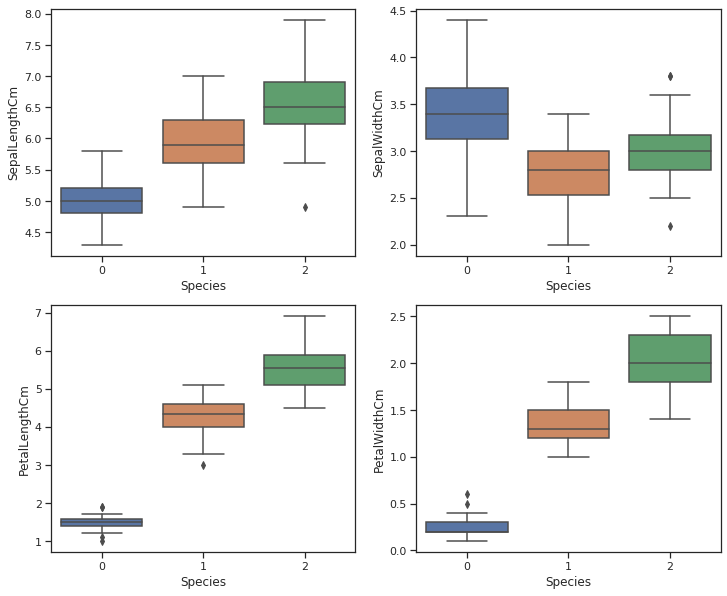

In [5]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

# The isolated points that can be seen in the box-plots above are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

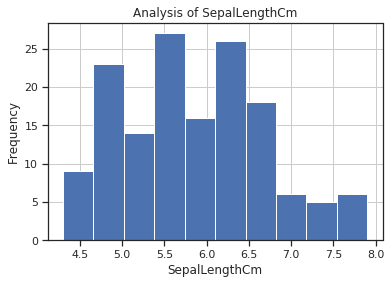

In [6]:
df.SepalLengthCm.hist()
plt.title('Analysis of SepalLengthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.savefig('SepalLengthCm')

# Observation: Distribution is not perfectly Gaussian since the tails of the distribution have ample data.

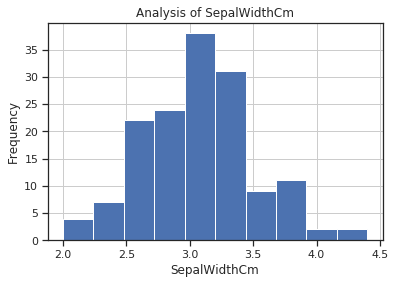

In [7]:
df.SepalWidthCm.hist()
plt.title('Analysis of SepalWidthCm')
plt.xlabel('SepalWidthCm')
plt.ylabel('Frequency')
plt.savefig('SepalWidthCm')

# Observation: Distribution looks normally distributed. 

In [0]:
df.PetalLengthCm.hist()
plt.title('Analysis of PetalLengthCm')
plt.xlabel('PetalLengthCm')
plt.ylabel('Frequency')
plt.savefig('PetalLengthCm')

# Observation: Missing data at interval between 2-3cm. Was the sample size too small and so data was not collected or does data for these points not exist in nature? How do we correct?

In [0]:
df.PetalWidthCm.hist()
plt.title('Analysis of PetalWidthCm')
plt.xlabel('PetalWidthCm')
plt.ylabel('Frequency')
plt.savefig('PetPetalWidthCmalLengthCm')

In [0]:
df.groupby('Species').mean()

# Observations:

Sepal Width variable may not be a great predictor of the class but petal width may be a good predictor variable

In [0]:
corr = df.corr()[['Species']].sort_values(by='Species',ascending=False)
corr.style.background_gradient()

# Petal length and width very highly correlated with class of flower. Sepal Width has a lesser correlation that is negative. This suggests that the top 3 vars should be included in our model (that is omit Sepal Width)

In [0]:
sns.regplot('SepalLengthCm', # Horizontal axis
           'Species', # Vertical axis
           data=df)

# Observation: from the plot we can see that there is a lot of overlap between the 3 classes in terms of Sepal Length data points

In [0]:
sns.regplot('SepalWidthCm', # Horizontal axis
           'Species', # Vertical axis
           data=df)

# Again, while there is a negative correlation here there is a lot of overlap

In [0]:
sns.regplot('PetalLengthCm', # Horizontal axis
           'Species', # Vertical axis
           data=df)

# Observation: Petal length would be a good var to classify between class 0 and class 1 and less so between class 1 and class 2

In [0]:
sns.regplot('PetalWidthCm', # Horizontal axis
           'Species', # Vertical axis
           data=df)

# Observation: Petal Width would be a good var to classify between class 0 and class 1 and less so between class 1 and class 2

In [16]:
formula_str="SepalLengthCm~C(Species)"
result=smf.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.67e-31
Time:                        18:27:09   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.0060      0.073     

# Observations: P value suggests var is statistically significant. How about the JB and the Durbin Watson values? Are they on the low side? Or ok? Does it make sense to perform a regression analysis like this when there is more than one independent variable? Should we conduct a multivariate analysis instead?

In [17]:
formula_str="SepalWidthCm~C(Species)"
result=smf.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           SepalWidthCm   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     47.36
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.33e-16
Time:                        18:27:20   Log-Likelihood:                -49.688
No. Observations:                 150   AIC:                             105.4
Df Residuals:                     147   BIC:                             114.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4180      0.048     

# Observation: Durbin Watson and JB values - what is the impact here if any?

In [18]:
formula_str="PetalLengthCm~C(Species)"
result=smf.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           3.05e-91
Time:                        18:27:25   Log-Likelihood:                -84.840
No. Observations:                 150   AIC:                             175.7
Df Residuals:                     147   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4640      0.061     

In [19]:
formula_str="PetalWidthCm~C(Species)"
result=smf.ols(formula=formula_str,data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     959.3
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           4.38e-85
Time:                        18:27:28   Log-Likelihood:                 26.411
No. Observations:                 150   AIC:                            -46.82
Df Residuals:                     147   BIC:                            -37.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2440      0.029     

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X = add_constant(X)
y=df['Species']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

# What is the significance of this test on the data?

In [0]:

x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']
logit = sml.MNLogit(y, x)
mdl_fit = logit.fit()
print(mdl_fit.summary())

# Observation: StatsModel convergence failure when doing multivariate analysis. What is the best way to conduct analysis of dataset and to find reliable p-values for each coefficient?

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

In [0]:
y_pred = classifier.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Create the confusion matrix

What is this telling us? It is telling us what our Logistis Regression classifier predicted (on the test set). So, taking one example of the box that says 13. This is saying our model predicted 13 test set records were class 0 and these 13 records were classified correctly (note the test set has an actual output or class value for each record). We compare what we predicted against each actual output value on the test set).

Look at the box marked 1. This is telling us that the actual class the flower belonged to was 1 but we predicted that the test set record belonged to class 2.

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

[link text](https://muthu.co/understanding-the-classification-report-in-sklearn/)   ...<<<---understanding classification report